# Week 4: Using real world data

Welcome! So far you have worked exclusively with generated data. This time you will be using the [Daily Minimum Temperatures in Melbourne](https://github.com/jbrownlee/Datasets/blob/master/daily-min-temperatures.csv) dataset which contains data of the daily minimum temperatures recorded in Melbourne from 1981 to 1990. In addition to be using Tensorflow's layers for processing sequence data such as Recurrent layers or LSTMs you will also use Convolutional layers to improve the model's performance.

Let's get started!

In [ ]:
import csv
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [ ]:
from helper_functions import evaluate_preds

Begin by looking at the structure of the csv that contains the data:

In [ ]:
TEMPERATURES_CSV = './tmp/daily-min-temperatures.csv'

with open(TEMPERATURES_CSV, 'r') as csvfile:
    print(f"Header looks like this:\n\n{csvfile.readline()}")
    print(f"First data point looks like this:\n\n{csvfile.readline()}")
    print(f"Second data point looks like this:\n\n{csvfile.readline()}")

Header looks like this:

"Date","Temp"

First data point looks like this:

"1981-01-01",20.7

Second data point looks like this:

"1981-01-02",17.9


In [ ]:
tf.__version__

'2.10.0'

In [ ]:
temp_url = "https://github.com/jbrownlee/Datasets/blob/master/daily-min-temperatures.csv"  # shortcut URL

In [ ]:
# filepath = tf.keras.utils.get_file("daily-min-temperatures.csv", temp_url)
# filepath


In [ ]:
#!wget temp_url
#!wget -q -P /content/ -N https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

In [ ]:
!curl --help

Usage: curl [options...] <url>
 -d, --data <data>          HTTP POST data
 -f, --fail                 Fail fast with no output on HTTP errors
 -h, --help <category>      Get help for commands
 -i, --include              Include protocol response headers in the output
 -o, --output <file>        Write to file instead of stdout
 -O, --remote-name          Write output to a file named as the remote file
 -s, --silent               Silent mode
 -T, --upload-file <file>   Transfer local FILE to destination
 -u, --user <user:password> Server user and password
 -A, --user-agent <name>    Send User-Agent <name> to server
 -v, --verbose              Make the operation more talkative
 -V, --version              Show version number and quit

This is not the full help, this menu is stripped into categories.
Use "--help category" to get an overview of all categories.
For all options use the manual or "--help all".


## CURL is similar to Wget . Curl doesnt like single quotes
# you need to use -s for silent
# -o to output file

In [ ]:
temp_url

'https://github.com/jbrownlee/Datasets/blob/master/daily-min-temperatures.csv'

In [ ]:
!curl  -o ./content/daily-min-temperatures.csv "https://github.com/jbrownlee/Datasets/blob/master/daily-min-temperatures.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  223k    0  223k    0     0   380k      0 --:--:-- --:--:-- --:--:--  381k


In [ ]:
import pandas as pd


In [ ]:
filepath1='./tmp/daily-min-temperatures.csv'


In [ ]:
df=pd.read_csv(filepath1,parse_dates=['Date'],index_col=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [ ]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [ ]:
df.Temp

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [ ]:
df=df.rename(columns={"Temp":"temp"})

In [ ]:
df.temp

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: temp, Length: 3650, dtype: float64

As you can see, each data point is composed of the date and the recorded minimum temperature for that date.


In the first exercise you will code a function to read the data from the csv but for now run the next cell to load a helper function to plot the time series.

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

## Parsing the raw data
Now you need to read the data from the csv file. To do so, complete the `parse_data_from_file` function.

A couple of things to note:

- You should omit the first line as the file contains headers.
- There is no need to save the data points as numpy arrays, regular lists is fine.
- To read from csv files use `csv.reader` by passing the appropriate arguments.
- `csv.reader` returns an iterable that returns each row in every iteration. So the temperature can be accessed via row[1] and the date can be discarded.
- The `times` list should contain every timestep (starting at zero), which is just a sequence of ordered numbers with the same length as the `temperatures` list.
- The values of the `temperatures` should be of `float` type. You can use Python's built-in `float` function to ensure this.

In [ ]:
def parse_data_from_file(filename):

    times = []
    temperatures = []
    temperatures = df.temp.tolist()
    # times=df.temp.count.tolist()
    times=np.arange(0,len(temperatures),1,dtype=float).tolist()


    # with open(filename) as csvfile:

    #     ### START CODE HERE

    #     # reader = csv.reader(None, delimiter=None)

    #     ### END CODE HERE

    return times, temperatures

TEMPERATURES_CSV1 = './data/min-temperatures.csv'
# TEMPERATURES_CSV1 = './data/daily-min-temperatures.csv'
# parse_data_from_file(TEMPERATURES_CSV1)

The next cell will use your function to compute the `times` and `temperatures` and will save these as numpy arrays within the `G` dataclass. This cell will also plot the time series:

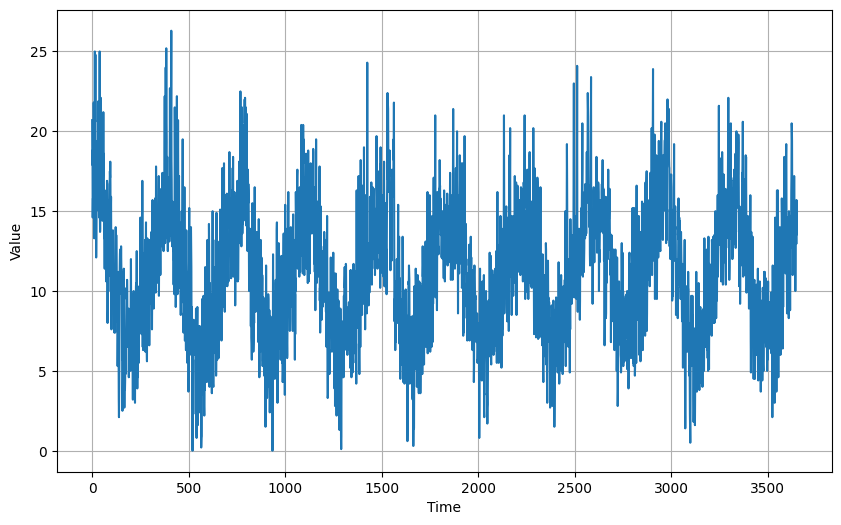

In [ ]:
# Test your function and save all "global" variables within the G class (G stands for global)
@dataclass
class G:
    TEMPERATURES_CSV = './data/daily-min-temperatures.csv'
    times, temperatures = parse_data_from_file(TEMPERATURES_CSV)
    TIME = np.array(times)
    SERIES = np.array(temperatures)
    SPLIT_TIME = 2500
    WINDOW_SIZE = 64
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 1000


plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

In [ ]:
# G.TIME
np.max(G.SERIES),np.min(G.SERIES),np.mean(G.SERIES),type(G.SERIES),G.SERIES.dtype,G.TIME.dtype

(26.3,
 0.0,
 11.177753424657535,
 numpy.ndarray,
 dtype('float64'),
 dtype('float64'))

**Expected Output:**
<div>
<img src="images/temp-series.png" width="500"/>
</div>

## Processing the data

Since you already coded the `train_val_split` and `windowed_dataset` functions during past week's assignments, this time they are provided for you:

In [ ]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid


# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [ ]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds


# Apply the transformation to the training set
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

In [ ]:
list(train_set.take(1))

[(<tf.Tensor: shape=(32, 64), dtype=float64, numpy=
  array([[ 2.7,  4.3,  6.3, ..., 10.5,  7.6,  9.7],
         [14.3,  8.3,  5.3, ..., 11.8, 10.6, 10. ],
         [ 9.5,  9.5, 10.7, ...,  8.1,  5.5,  6.2],
         ...,
         [10. , 14.5, 11.7, ...,  6.7,  8.4,  6.5],
         [ 8.6, 11.9, 14. , ..., 10.7, 10. ,  6.5],
         [ 5. ,  7.4, 10.1, ..., 10.7, 16.9, 10.5]])>,
  <tf.Tensor: shape=(32,), dtype=float64, numpy=
  array([12.5, 12.2,  8. , 16. ,  7.3,  9.2, 12.2, 11.9, 11. , 11.4, 12.6,
          9.5, 10.7,  7.5, 15.7,  7.1, 13. , 10.4, 10.5, 10.5, 11.1, 11.6,
          8.3,  5.8, 12.2, 16.5,  8. ,  4.9, 11.9,  7.9,  7. ,  6.5])>)]

## Defining the model architecture

Now that you have a function that will process the data before it is fed into your neural network for training, it is time to define your layer architecture. Just as in last week's assignment you will do the layer definition and compilation in two separate steps. Begin by completing the `create_uncompiled_model` function below.

This is done so you can reuse your model's layers for the learning rate adjusting and the actual training.

Hint:

- `Lambda` layers are not required.
- Use a combination of `Conv1D` and `LSTM` layers followed by `Dense` layers

In [ ]:
def create_uncompiled_model():

    ### START CODE HERE

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                          strides=1,
                          activation="relu",
                          padding='causal',
                          input_shape=[None, 1]),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(30, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu"),
      tf.keras.layers.Dense(1),

    ])

    ### END CODE HERE

    return model

In [ ]:
def create_uncompiled_model():

    ### START CODE HERE

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                          strides=1,
                          activation="relu",
                          padding='causal',
                          input_shape=[None, 1]),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(30, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu"),
      tf.keras.layers.Dense(1),

    ])

    ### END CODE HERE

    return model

In [ ]:

# Test your uncompiled model
uncompiled_model = create_uncompiled_model()

try:
    uncompiled_model.predict(train_set)
except:
    print("Your current architecture is incompatible with the windowed dataset, try adjusting it.")
else:
    print("Your current architecture is compatible with the windowed dataset! :)")

77/77 [==============================] - 15s 15ms/step
Your current architecture is compatible with the windowed dataset! :)


## Adjusting the learning rate - (Optional Exercise)

As you saw in the lecture you can leverage Tensorflow's callbacks to dinamically vary the learning rate during training. This can be helpful to get a better sense of which learning rate better acommodates to the problem at hand.

**Notice that this is only changing the learning rate during the training process to give you an idea of what a reasonable learning rate is and should not be confused with selecting the best learning rate, this is known as hyperparameter optimization and it is outside the scope of this course.**

For the optimizers you can try out:

- tf.keras.optimizers.Adam
- tf.keras.optimizers.SGD with a momentum of 0.9

In [ ]:
def adjust_learning_rate(dataset):

    model = create_uncompiled_model()

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

    ### START CODE HERE

    # Select your optimizer
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)

    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    ### END CODE HERE

    history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

    return history

In [ ]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set)

Epoch 1/100
77/77 [==============================] - 4s 12ms/step - loss: 9.9906 - mae: 10.4892 - lr: 1.0000e-04
Epoch 2/100
77/77 [==============================] - 1s 10ms/step - loss: 9.3403 - mae: 9.8390 - lr: 1.1220e-04
Epoch 3/100
77/77 [==============================] - 1s 10ms/step - loss: 7.7084 - mae: 8.2044 - lr: 1.2589e-04
Epoch 4/100
77/77 [==============================] - 1s 10ms/step - loss: 3.7514 - mae: 4.2249 - lr: 1.4125e-04
Epoch 5/100
77/77 [==============================] - 1s 10ms/step - loss: 2.4421 - mae: 2.9039 - lr: 1.5849e-04
Epoch 6/100
77/77 [==============================] - 1s 10ms/step - loss: 2.0714 - mae: 2.5262 - lr: 1.7783e-04
Epoch 7/100
77/77 [==============================] - 1s 11ms/step - loss: 1.9285 - mae: 2.3828 - lr: 1.9953e-04
Epoch 8/100
77/77 [==============================] - 1s 10ms/step - loss: 1.7915 - mae: 2.2433 - lr: 2.2387e-04
Epoch 9/100
77/77 [==============================] - 1s 10ms/step - loss: 1.8720 - mae: 2.3268 - lr: 2.

(0.0001, 10.0, 0.0, 10.0)

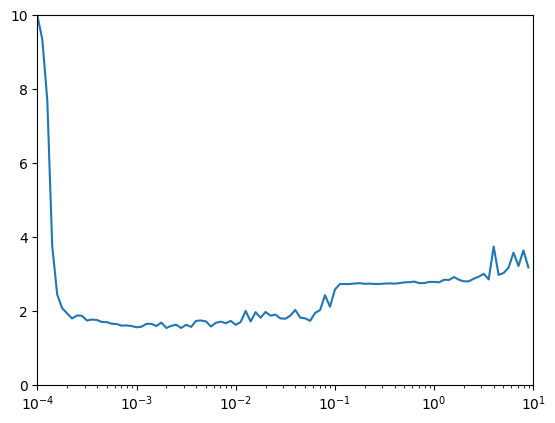

In [ ]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 10])

## Compiling the model
Now that you have trained the model while varying the learning rate, it is time to do the actual training that will be used to forecast the time series. For this complete the `create_model` function below.

Notice that you are reusing the architecture you defined in the `create_uncompiled_model` earlier. Now you only need to compile this model using the appropriate loss, optimizer (and learning rate).

Hints:

- The training should be really quick so if you notice that each epoch is taking more than a few seconds, consider trying a different architecture.


- If after the first epoch you get an output like this: loss: nan - mae: nan it is very likely that your network is suffering from exploding gradients. This is a common problem if you used SGD as optimizer and set a learning rate that is too high. If you encounter this problem consider lowering the learning rate or using Adam with the default learning rate.

In [ ]:
def create_model():


    model = create_uncompiled_model()

    ### START CODE HERE

    # model.compile(loss=None,
    #               optimizer=None,
    #               metrics=["mae"])
    optimizer = tf.keras.optimizers.SGD(learning_rate=3e-3,momentum=0.9)

    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])


    ### END CODE HERE

    return model

In [ ]:
# Save an instance of the model
model = create_model()

# Train it
history = model.fit(train_set, epochs=50)

Epoch 1/50
77/77 [==============================] - 2s 9ms/step - loss: 4.5734 - mae: 5.0513
Epoch 2/50
77/77 [==============================] - 1s 9ms/step - loss: 2.1436 - mae: 2.6045
Epoch 3/50
77/77 [==============================] - 1s 9ms/step - loss: 1.8352 - mae: 2.2883
Epoch 4/50
77/77 [==============================] - 1s 9ms/step - loss: 1.8120 - mae: 2.2660
Epoch 5/50
77/77 [==============================] - 1s 9ms/step - loss: 1.5986 - mae: 2.0457
Epoch 6/50
77/77 [==============================] - 1s 9ms/step - loss: 1.6202 - mae: 2.0656
Epoch 7/50
77/77 [==============================] - 1s 9ms/step - loss: 1.6654 - mae: 2.1122
Epoch 8/50
77/77 [==============================] - 1s 9ms/step - loss: 1.5838 - mae: 2.0308
Epoch 9/50
77/77 [==============================] - 1s 9ms/step - loss: 1.6056 - mae: 2.0536
Epoch 10/50
77/77 [==============================] - 1s 9ms/step - loss: 1.6507 - mae: 2.1007
Epoch 11/50
77/77 [==============================] - 1s 9ms/step - lo

## Evaluating the forecast

Now it is time to evaluate the performance of the forecast. For this you can use the `compute_metrics` function that you coded in a previous assignment:

In [ ]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

At this point only the model that will perform the forecast is ready but you still need to compute the actual forecast.



## Faster model forecasts

In the previous week you saw a faster approach compared to using a for loop to compute the forecasts for every point in the sequence. Remember that this faster approach uses batches of data.

The code to implement this is provided in the `model_forecast` below. Notice that the code is very similar to the one in the `windowed_dataset` function with the differences that:
- The dataset is windowed using `window_size` rather than `window_size + 1`
- No shuffle should be used
- No need to split the data into features and labels
- A model is used to predict batches of the dataset

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

Now compute the actual forecast:

**Note:** Don't modify the cell below.

The grader uses the same slicing to get the forecast so if you change the cell below you risk having issues when submitting your model for grading.

## use blw to forecast

36/36 [==============================] - 0s 4ms/step
ours_forecasted.shape (1150, 1)
ours_forecasted[:5] [[10.571054]
 [ 9.880585]
 [10.78812 ]
 [11.543207]
 [ 9.82802 ]]
ours_forecasted_sqz.shape (1150,)
ours_forecasted_sqz[:5] [10.571054  9.880585 10.78812  11.543207  9.82802 ]


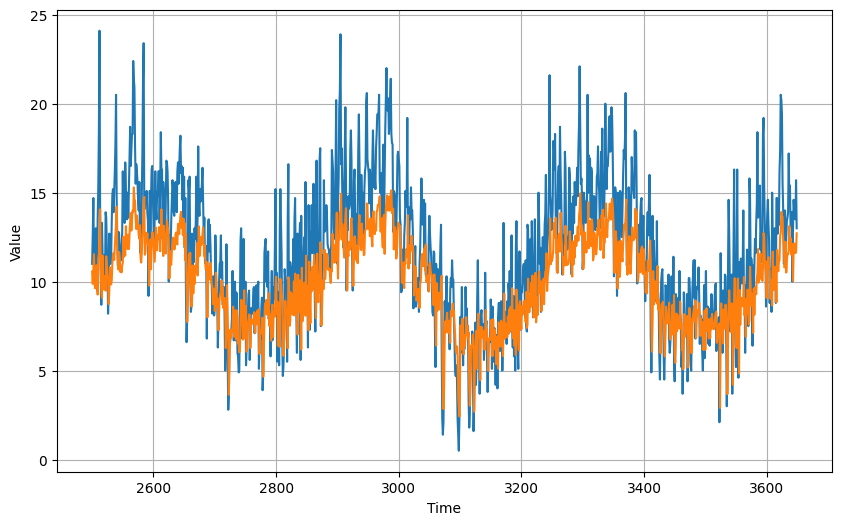

In [ ]:
ours_xval_series = G.SERIES[G.SPLIT_TIME-G.WINDOW_SIZE:-1]
ours_forecasted=model_forecast(model, ours_xval_series, G.WINDOW_SIZE)
print('ours_forecasted.shape',ours_forecasted.shape)
print('ours_forecasted[:5]',ours_forecasted[:5])
ours_forecasted_sqz=ours_forecasted.squeeze()
print('ours_forecasted_sqz.shape',ours_forecasted_sqz.shape)
print('ours_forecasted_sqz[:5]',ours_forecasted_sqz[:5])

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, ours_forecasted_sqz)

## blw also gives same result always like above

In [ ]:
# # Compute the forecast for all the series
# rnn_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()
#
# # Slice the forecast to get only the predictions for the validation set
# rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]
#
# print('rnn_forecast.shape',rnn_forecast.shape)
# print('rnn_forecast[:5]',rnn_forecast[:5])
#
# np.allclose(rnn_forecast,ours_forecasted_sqz)
# # # Plot the forecast
# # plt.figure(figsize=(10, 6))
# # plot_series(time_valid, series_valid)
# # plot_series(time_valid, rnn_forecast)

In [ ]:
mse, mae = compute_metrics(series_valid, ours_forecasted_sqz)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 8.65, mae: 2.35 for forecast


In [ ]:
rslt_con_lstm=evaluate_preds(series_valid,ours_forecasted_sqz)
rslt_con_lstm

{'mae': 2.3465104,
 'mse': 8.645832,
 'rmse': 2.9403796,
 'mape': 21.209625,
 'mase': 1.1662517}

In [ ]:
def create_uncompiled_model_RNN():

    ### START CODE HERE

    # model = tf.keras.models.Sequential([
    #   tf.keras.layers.Conv1D(filters=64, kernel_size=3,
    #                       strides=1,
    #                       activation="relu",
    #                       padding='causal',
    #                       input_shape=[None, 1]),
    #   tf.keras.layers.LSTM(64, return_sequences=True),
    #   tf.keras.layers.LSTM(64),
    #   tf.keras.layers.Dense(30, activation="relu"),
    #   tf.keras.layers.Dense(10, activation="relu"),
    #   tf.keras.layers.Dense(1),
    # ])

    # tf.random.set_seed(42)  # extra code – ensures reproducibility
    model_RNN=tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None,1]),
        tf.keras.layers.SimpleRNN(64),
        tf.keras.layers.Dense(32,activation="relu"),
        tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    # tf.random.set_seed(42)  # extra code – ensures reproducibility
    # model=tf.keras.Sequential([
    #     tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 1]),
    #     tf.keras.layers.SimpleRNN(32),
    #     tf.keras.layers.Dense(1)
    #     # equivalent: tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(14))
    #     # also equivalent: tf.keras.layers.Conv1D(14, kernel_size=1)
    # ])




    ### END CODE HERE

    return model_RNN

In [ ]:

# Test your uncompiled model
uncompiled_model_RNN = create_uncompiled_model_RNN()

try:
    uncompiled_model_RNN.predict(train_set)
except:
    print("Your current architecture is incompatible with the windowed dataset, try adjusting it.")
else:
    print("Your current architecture is compatible with the windowed dataset! :)")

77/77 [==============================] - 1s 11ms/step
Your current architecture is compatible with the windowed dataset! :)


## Adjusting the learning rate - (Optional Exercise)

As you saw in the lecture you can leverage Tensorflow's callbacks to dinamically vary the learning rate during training. This can be helpful to get a better sense of which learning rate better acommodates to the problem at hand.

**Notice that this is only changing the learning rate during the training process to give you an idea of what a reasonable learning rate is and should not be confused with selecting the best learning rate, this is known as hyperparameter optimization and it is outside the scope of this course.**

For the optimizers you can try out:

- tf.keras.optimizers.Adam
- tf.keras.optimizers.SGD with a momentum of 0.9

In [ ]:
def adjust_learning_rate(dataset):

    model_RNN = create_uncompiled_model_RNN()

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

    ### START CODE HERE

    # Select your optimizer
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)

    # Compile the model passing in the appropriate loss
    model_RNN.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    ### END CODE HERE

    history = model_RNN.fit(dataset, epochs=100, callbacks=[lr_schedule])

    return history

In [ ]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set)

Epoch 1/100
77/77 [==============================] - 5s 50ms/step - loss: 7.7016 - mae: 8.1975 - lr: 1.0000e-04
Epoch 2/100
77/77 [==============================] - 4s 47ms/step - loss: 2.6493 - mae: 3.1137 - lr: 1.1220e-04
Epoch 3/100
77/77 [==============================] - 4s 48ms/step - loss: 1.9376 - mae: 2.3905 - lr: 1.2589e-04
Epoch 4/100
77/77 [==============================] - 5s 69ms/step - loss: 1.6571 - mae: 2.1019 - lr: 1.4125e-04
Epoch 5/100
77/77 [==============================] - 10s 130ms/step - loss: 1.5822 - mae: 2.0280 - lr: 1.5849e-04
Epoch 6/100
77/77 [==============================] - 9s 121ms/step - loss: 1.5516 - mae: 1.9952 - lr: 1.7783e-04
Epoch 7/100
77/77 [==============================] - 10s 123ms/step - loss: 1.5301 - mae: 1.9716 - lr: 1.9953e-04
Epoch 8/100
77/77 [==============================] - 10s 130ms/step - loss: 1.5358 - mae: 1.9786 - lr: 2.2387e-04
Epoch 9/100
77/77 [==============================] - 10s 132ms/step - loss: 1.5009 - mae: 1.9404 

(0.0001, 10.0, 0.0, 10.0)

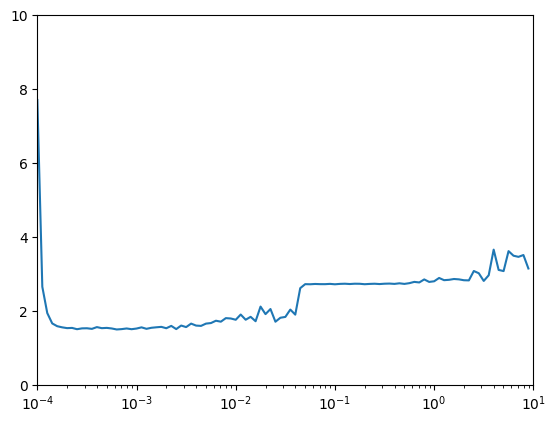

In [ ]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 10])

## Compiling the model
Now that you have trained the model while varying the learning rate, it is time to do the actual training that will be used to forecast the time series. For this complete the `create_model` function below.

Notice that you are reusing the architecture you defined in the `create_uncompiled_model` earlier. Now you only need to compile this model using the appropriate loss, optimizer (and learning rate).

Hints:

- The training should be really quick so if you notice that each epoch is taking more than a few seconds, consider trying a different architecture.


- If after the first epoch you get an output like this: loss: nan - mae: nan it is very likely that your network is suffering from exploding gradients. This is a common problem if you used SGD as optimizer and set a learning rate that is too high. If you encounter this problem consider lowering the learning rate or using Adam with the default learning rate.

In [ ]:
def create_model_RNN():


    model = create_uncompiled_model_RNN()

    ### START CODE HERE

    # model.compile(loss=None,
    #               optimizer=None,
    #               metrics=["mae"])
    optimizer = tf.keras.optimizers.SGD(learning_rate=9e-2,momentum=0.9)

    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])


    ### END CODE HERE

    return model

In [ ]:
# Save an instance of the model
model_RNN = create_model_RNN()

# Train it
history = model_RNN.fit(train_set, epochs=50)

Epoch 1/50
77/77 [==============================] - 5s 57ms/step - loss: 4.0923 - mae: 4.5680
Epoch 2/50
77/77 [==============================] - 4s 55ms/step - loss: 2.7260 - mae: 3.1918
Epoch 3/50
77/77 [==============================] - 4s 57ms/step - loss: 2.7246 - mae: 3.1908
Epoch 4/50
77/77 [==============================] - 5s 58ms/step - loss: 2.7244 - mae: 3.1907
Epoch 5/50
77/77 [==============================] - 4s 56ms/step - loss: 2.7151 - mae: 3.1797
Epoch 6/50
77/77 [==============================] - 4s 55ms/step - loss: 2.7280 - mae: 3.1962
Epoch 7/50
77/77 [==============================] - 5s 60ms/step - loss: 2.7164 - mae: 3.1827
Epoch 8/50
77/77 [==============================] - 4s 54ms/step - loss: 2.7177 - mae: 3.1838
Epoch 9/50
77/77 [==============================] - 5s 59ms/step - loss: 2.7199 - mae: 3.1854
Epoch 10/50
77/77 [==============================] - 4s 56ms/step - loss: 2.7177 - mae: 3.1842
Epoch 11/50
77/77 [==============================] - 4s 57m

## Evaluating the forecast

Now it is time to evaluate the performance of the forecast. For this you can use the `compute_metrics` function that you coded in a previous assignment:

In [ ]:
# def compute_metrics(true_series, forecast):
#
#     mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
#     mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
#
#     return mse, mae

At this point only the model that will perform the forecast is ready but you still need to compute the actual forecast.



## Faster model forecasts

In the previous week you saw a faster approach compared to using a for loop to compute the forecasts for every point in the sequence. Remember that this faster approach uses batches of data.

The code to implement this is provided in the `model_forecast` below. Notice that the code is very similar to the one in the `windowed_dataset` function with the differences that:
- The dataset is windowed using `window_size` rather than `window_size + 1`
- No shuffle should be used
- No need to split the data into features and labels
- A model is used to predict batches of the dataset

In [ ]:
# def model_forecast(model, series, window_size):
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size, shift=1, drop_remainder=True)
#     ds = ds.flat_map(lambda w: w.batch(window_size))
#     ds = ds.batch(32).prefetch(1)
#     forecast = model.predict(ds)
#     return forecast

Now compute the actual forecast:

**Note:** Don't modify the cell below.

The grader uses the same slicing to get the forecast so if you change the cell below you risk having issues when submitting your model for grading.

## use blw to forecast

## simple rnn, didnt do great,
```
36/36 [==============================] - 0s 11ms/step
ours_forecasted_rnn.shape (1150, 1)
ours_forecasted_rnn[:5] [[10.325488]
 [10.325488]
 [10.325488]
 [10.325488]
 [10.325488]]
ours_forecasted_rnn_sqz.shape (1150,)
ours_forecasted_rnn_sqz[:5] [10.325488 10.325488 10.325488 10.325488 10.325488]
```

36/36 [==============================] - 0s 11ms/step
ours_forecasted_rnn.shape (1150, 1)
ours_forecasted_rnn[:5] [[10.325488]
 [10.325488]
 [10.325488]
 [10.325488]
 [10.325488]]
ours_forecasted_rnn_sqz.shape (1150,)
ours_forecasted_rnn_sqz[:5] [10.325488 10.325488 10.325488 10.325488 10.325488]


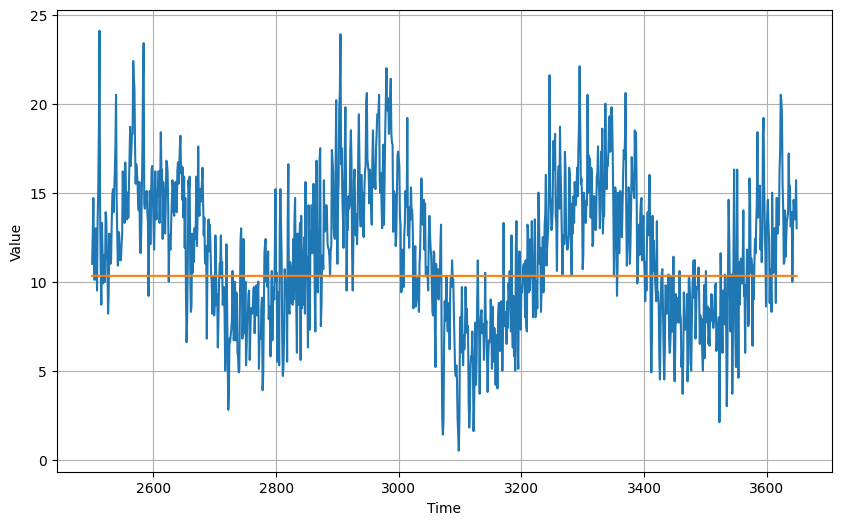

In [ ]:
ours_xval_series = G.SERIES[G.SPLIT_TIME-G.WINDOW_SIZE:-1]
ours_forecasted_rnn=model_forecast(model_RNN, ours_xval_series, G.WINDOW_SIZE)
print('ours_forecasted_rnn.shape',ours_forecasted_rnn.shape)
print('ours_forecasted_rnn[:5]',ours_forecasted_rnn[:5])
ours_forecasted_rnn_sqz=ours_forecasted_rnn.squeeze()
print('ours_forecasted_rnn_sqz.shape',ours_forecasted_rnn_sqz.shape)
print('ours_forecasted_rnn_sqz[:5]',ours_forecasted_rnn_sqz[:5])

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, ours_forecasted_rnn_sqz)

In [ ]:
# def compute_metrics(true_series, forecast):
#
#     mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
#     mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
#
#     return mse, mae

## simple rnn,
mse: 8.65, mae: 2.35 for forecast

In [ ]:
mse, mae = compute_metrics(series_valid, ours_forecasted_rnn_sqz)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 17.55, mae: 3.40 for forecast


In [ ]:
rslt_simple_rnn=evaluate_preds(series_valid,ours_forecasted_rnn_sqz)
rslt_simple_rnn

{'mae': 3.4018025,
 'mse': 17.553642,
 'rmse': 4.189707,
 'mape': 35.93393,
 'mase': 1.6907481}

In [112]:
from tensorflow.keras import layers,Input,Model

In [118]:
def mul_four_hundred(ii):
    return ii*11
    # return tf.math.multiply(ii,400)

mul_four_hundred(2)

# Build the Model
def create_model_no_lmbda_fnc_api_mult():
    input_ly = layers.Input(shape=[None, 1])
    srnn_ly = layers.SimpleRNN(64, return_sequences=True, input_shape=[None,1])(input_ly)
    srnn_ly1 = layers.SimpleRNN(64)(srnn_ly)
    den_ly2 = layers.Dense(32, activation="relu")(srnn_ly1)
    den_ly3 = layers.Dense(10, activation="relu")(den_ly2)
    den_ly4 = layers.Dense(1)(den_ly3)
    output_ly = mul_four_hundred(den_ly4)
    model_ram_fnc_api = Model(input_ly, output_ly)
    return model_ram_fnc_api

In [119]:

# Test your uncompiled model
uncompiled_model_mul_RNN = create_model_no_lmbda_fnc_api_mult()

try:
    uncompiled_model_mul_RNN.predict(train_set)
except:
    print("Your current architecture is incompatible with the windowed dataset, try adjusting it.")
else:
    print("Your current architecture is compatible with the windowed dataset! :)")

77/77 [==============================] - 1s 14ms/step
Your current architecture is compatible with the windowed dataset! :)


## Adjusting the learning rate - (Optional Exercise)

As you saw in the lecture you can leverage Tensorflow's callbacks to dinamically vary the learning rate during training. This can be helpful to get a better sense of which learning rate better acommodates to the problem at hand.

**Notice that this is only changing the learning rate during the training process to give you an idea of what a reasonable learning rate is and should not be confused with selecting the best learning rate, this is known as hyperparameter optimization and it is outside the scope of this course.**

For the optimizers you can try out:

- tf.keras.optimizers.Adam
- tf.keras.optimizers.SGD with a momentum of 0.9

In [120]:
def adjust_learning_rate(dataset):

    model_mul_RNN = create_model_no_lmbda_fnc_api_mult()

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

    ### START CODE HERE

    # Select your optimizer
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)

    # Compile the model passing in the appropriate loss
    model_mul_RNN.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    ### END CODE HERE

    history = model_mul_RNN.fit(dataset, epochs=100, callbacks=[lr_schedule])

    return history

In [121]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set)

Epoch 1/100
77/77 [==============================] - 7s 80ms/step - loss: 1.8632 - mae: 2.3168 - lr: 1.0000e-04
Epoch 2/100
77/77 [==============================] - 6s 77ms/step - loss: 1.6126 - mae: 2.0585 - lr: 1.1220e-04
Epoch 3/100
77/77 [==============================] - 6s 78ms/step - loss: 1.7228 - mae: 2.1730 - lr: 1.2589e-04
Epoch 4/100
77/77 [==============================] - 6s 77ms/step - loss: 1.5676 - mae: 2.0141 - lr: 1.4125e-04
Epoch 5/100
77/77 [==============================] - 6s 78ms/step - loss: 1.5907 - mae: 2.0333 - lr: 1.5849e-04
Epoch 6/100
77/77 [==============================] - 6s 75ms/step - loss: 1.5926 - mae: 2.0391 - lr: 1.7783e-04
Epoch 7/100
77/77 [==============================] - 6s 78ms/step - loss: 1.5761 - mae: 2.0239 - lr: 1.9953e-04
Epoch 8/100
77/77 [==============================] - 6s 75ms/step - loss: 1.6338 - mae: 2.0781 - lr: 2.2387e-04
Epoch 9/100
77/77 [==============================] - 6s 74ms/step - loss: 1.5888 - mae: 2.0305 - lr: 2.5

KeyboardInterrupt: 

(0.0001, 10.0, 0.0, 10.0)

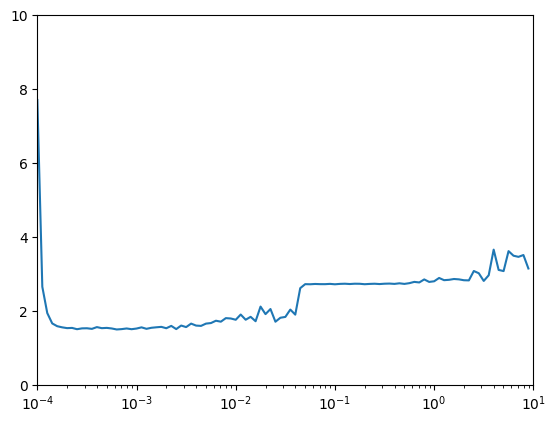

In [122]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 10])

## Compiling the model
Now that you have trained the model while varying the learning rate, it is time to do the actual training that will be used to forecast the time series. For this complete the `create_model` function below.

Notice that you are reusing the architecture you defined in the `create_uncompiled_model` earlier. Now you only need to compile this model using the appropriate loss, optimizer (and learning rate).

Hints:

- The training should be really quick so if you notice that each epoch is taking more than a few seconds, consider trying a different architecture.


- If after the first epoch you get an output like this: loss: nan - mae: nan it is very likely that your network is suffering from exploding gradients. This is a common problem if you used SGD as optimizer and set a learning rate that is too high. If you encounter this problem consider lowering the learning rate or using Adam with the default learning rate.

In [123]:
def create_model_mul_RNN():


    model = create_model_no_lmbda_fnc_api_mult()

    ### START CODE HERE

    # model.compile(loss=None,
    #               optimizer=None,
    #               metrics=["mae"])
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9)

    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])


    ### END CODE HERE

    return model

In [124]:
# Save an instance of the model
model_mul_RNN = create_model_mul_RNN()

# Train it
history = model_mul_RNN.fit(train_set, epochs=50)

Epoch 1/50
77/77 [==============================] - 7s 77ms/step - loss: 2.1472 - mae: 2.6038
Epoch 2/50
77/77 [==============================] - 6s 75ms/step - loss: 1.6979 - mae: 2.1452
Epoch 3/50
77/77 [==============================] - 6s 74ms/step - loss: 1.6371 - mae: 2.0820
Epoch 4/50
77/77 [==============================] - 6s 72ms/step - loss: 1.5999 - mae: 2.0424
Epoch 5/50
77/77 [==============================] - 6s 73ms/step - loss: 1.6607 - mae: 2.1088
Epoch 6/50
77/77 [==============================] - 6s 75ms/step - loss: 1.7049 - mae: 2.1512
Epoch 7/50
77/77 [==============================] - 6s 73ms/step - loss: 1.6624 - mae: 2.1078
Epoch 8/50
77/77 [==============================] - 7s 84ms/step - loss: 1.5779 - mae: 2.0188
Epoch 9/50
77/77 [==============================] - 6s 79ms/step - loss: 1.5271 - mae: 1.9675
Epoch 10/50
77/77 [==============================] - 6s 82ms/step - loss: 1.5733 - mae: 2.0160
Epoch 11/50
77/77 [==============================] - 6s 80m

## Evaluating the forecast

Now it is time to evaluate the performance of the forecast. For this you can use the `compute_metrics` function that you coded in a previous assignment:

In [ ]:
# def compute_metrics(true_series, forecast):
#
#     mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
#     mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
#
#     return mse, mae

At this point only the model that will perform the forecast is ready but you still need to compute the actual forecast.



## Faster model forecasts

In the previous week you saw a faster approach compared to using a for loop to compute the forecasts for every point in the sequence. Remember that this faster approach uses batches of data.

The code to implement this is provided in the `model_forecast` below. Notice that the code is very similar to the one in the `windowed_dataset` function with the differences that:
- The dataset is windowed using `window_size` rather than `window_size + 1`
- No shuffle should be used
- No need to split the data into features and labels
- A model is used to predict batches of the dataset

In [ ]:
# def model_forecast(model, series, window_size):
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size, shift=1, drop_remainder=True)
#     ds = ds.flat_map(lambda w: w.batch(window_size))
#     ds = ds.batch(32).prefetch(1)
#     forecast = model.predict(ds)
#     return forecast

Now compute the actual forecast:

**Note:** Don't modify the cell below.

The grader uses the same slicing to get the forecast so if you change the cell below you risk having issues when submitting your model for grading.

## use blw to forecast

## simple rnn, didnt do great,
```
36/36 [==============================] - 0s 11ms/step
ours_forecasted_rnn.shape (1150, 1)
ours_forecasted_rnn[:5] [[10.325488]
 [10.325488]
 [10.325488]
 [10.325488]
 [10.325488]]
ours_forecasted_rnn_sqz.shape (1150,)
ours_forecasted_rnn_sqz[:5] [10.325488 10.325488 10.325488 10.325488 10.325488]
```

36/36 [==============================] - 1s 17ms/step
ours_forecasted_mul_rnn.shape (1150, 1)
ours_forecasted_mul_rnn[:5] [[12.476819]
 [12.015289]
 [12.852006]
 [13.657866]
 [12.14419 ]]
ours_forecasted_mul_rnn_sqz.shape (1150,)
ours_forecasted_mul_rnn_sqz[:5] [12.476819 12.015289 12.852006 13.657866 12.14419 ]


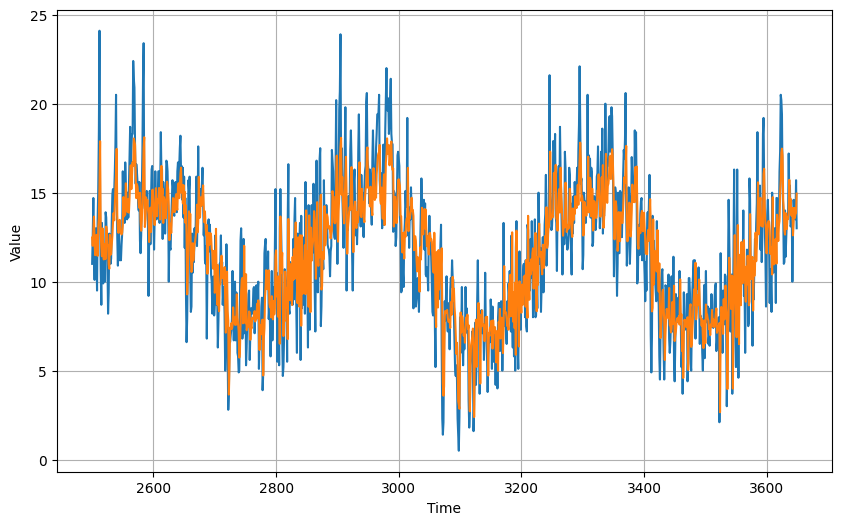

In [125]:
ours_xval_series = G.SERIES[G.SPLIT_TIME-G.WINDOW_SIZE:-1]
ours_forecasted_mul_rnn=model_forecast(model_mul_RNN, ours_xval_series, G.WINDOW_SIZE)
print('ours_forecasted_mul_rnn.shape',ours_forecasted_mul_rnn.shape)
print('ours_forecasted_mul_rnn[:5]',ours_forecasted_mul_rnn[:5])
ours_forecasted_mul_rnn_sqz=ours_forecasted_mul_rnn.squeeze()
print('ours_forecasted_mul_rnn_sqz.shape',ours_forecasted_mul_rnn_sqz.shape)
print('ours_forecasted_mul_rnn_sqz[:5]',ours_forecasted_mul_rnn_sqz[:5])

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, ours_forecasted_mul_rnn_sqz)

In [ ]:
# def compute_metrics(true_series, forecast):
#
#     mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
#     mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
#
#     return mse, mae

## simple rnn,
mse: 8.65, mae: 2.35 for forecast

In [126]:
mse, mae = compute_metrics(series_valid, ours_forecasted_mul_rnn_sqz)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 5.37, mae: 1.82 for forecast


In [127]:
rslt_simple_mul_rnn=evaluate_preds(series_valid,ours_forecasted_mul_rnn_sqz)
rslt_simple_mul_rnn

{'mae': 1.8158252,
 'mse': 5.3699465,
 'rmse': 2.3173144,
 'mape': 19.435757,
 'mase': 0.902493}

https://github.com/williamcwi/DeepLearning.AI-TensorFlow-Developer-Professional-Certificate/blob/master/4.%20Sequences%2C%20Time%20Serirs%20and%20Prediction/4.%20Real-world%20Time%20Series%20Data/assignment/C4_W4_Assignment_Solution.ipynb

**To pass this assignment your forecast should achieve a MSE of 6 or less and a MAE of 2 or less.**

- If your forecast didn't achieve this threshold try re-training your model with a different architecture (you will need to re-run both `create_uncompiled_model` and `create_model` functions) or tweaking the optimizer's parameters.


- If your forecast did achieve this threshold run the following cell to save the model in the SavedModel format which will be used for grading and after doing so, submit your assigment for grading.


- This environment includes a dummy SavedModel directory which contains a dummy model trained for one epoch. **To replace this file with your actual model you need to run the next cell before submitting for grading.**

In [ ]:
# # Save your model in the SavedModel format
# model.save('saved_model/my_model')
#
# # Compress the directory using tar
# ! tar -czvf saved_model.tar.gz saved_model/

**Congratulations on finishing this week's assignment!**

You have successfully implemented a neural network capable of forecasting time series leveraging a combination of Tensorflow's layers such as Convolutional and LSTMs! This resulted in a forecast that surpasses all the ones you did previously.

**By finishing this assignment you have finished the specialization! Give yourself a pat on the back!!!**